### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [2]:
#Importing the dataset
pd.set_option('display.max_colwidth', 2000)

df = pd.read_csv('acq.csv')          #using pandas to read the csv file
df.columns = ["index", "docs"]       #renaming the column headings
df

,index,docs
0,0,"COMPUTER TERMINAL SYSTEMS & lt ; CPML > COMPLETES SALE Computer Terminal Systems Inc said it has completed the sale of 200 , 000 shares of its common stock , and warrants to acquire an additional one mln shares , to & lt ; Sedio N . V .> of Lugano , Switzerland for 50 , 000 dlrs . The company said the warrants are exercisable for five years at a purchase price of . 125 dlrs per share . Computer Terminal said Sedio also has the right to buy additional shares and increase its total holdings up to 40 pct of the Computer Terminal ' s outstanding common stock under certain circumstances involving change of control at the company . The company said if the conditions occur the warrants would be exercisable at a price equal to 75 pct of its common stock ' s market price at the time , not to exceed 1 . 50 dlrs per share . Computer Terminal also said it sold the technolgy rights to its Dot Matrix impact technology , including any future improvements , to & lt ; Woodco Inc > of Houston , Tex . for 200 , 000 dlrs . But , it said it would continue to be the exclusive worldwide licensee of the technology for Woodco . The company said the moves were part of its reorganization plan and would help pay current operation costs and ensure product delivery . Computer Terminal makes computer generated labels , forms , tags and ticket printers and terminals ."
1,1,NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VIA > BID Viacom International Inc said & lt ; National Amusements Inc > has again raised the value of its offer for Viacom ' s publicly held stock . The company said the special committee of its board plans to meet later today to consider this offer and the one submitted March one by & lt ; MCV Holdings Inc >. A spokeswoman was unable to say if the committee met as planned yesterday . Viacom said National Amusements ' Arsenal Holdings Inc subsidiary has raised the amount of cash it is offering for each Viacom share by 75 cts to 42 . 75 dlrs while the value of the fraction of a share of exchangeable Arsenal Holdings preferred to be included was raised 25 cts to 7 . 75 dlrs . National Amusements already owns 19 . 6 pct of Viacom ' s stock .
2,2,"U . K . GROWING IMPATIENT WITH JAPAN - THATCHER Prime Minister Margaret Thatcher said the U . K . Was growing more impatient with Japanese trade barriers and warned that it would soon have new powers against countries not offering reciprocal access to their markets . She told Parliament that the bid by the U . K .' s Cable and Wireless Plc & lt ; CAWL . L > to enter the Japanese telecommunications market was being regarded by her government as a test case . "" I wrote to the prime minister of Japan , Mr Nakasone , on the fourth of March to express our interest on the Cable and Wireless bid . I have not yet had a reply . We see this as a test on how open the Japanese market really is ,"" Thatcher said . Thatcher told Parliament that "" shortly ... We shall have more powers than we have now , when , for example the powers under the Financial Services Act and the Banking Act become available , then we shall be able to take action in cases where other countries do not offer the same full access to financial services as we do ."" Cable and Wireless is seeking a stake in the proposed Japanese telecommunications rival to Kokusai Denshin Denwa . But the Japanese minister for post and telecommunications was reported as saying that he opposed Cable and Wireless having a managerial role in the new company ."
3,3,"GOULD & lt ; GLD > COMPLETES SALE OF FRENCH BATTERY UNIT Gould Inc said it has completed the sale of its French battery business , Compagnie Francaise D ' Electro Chimie , to a group of investors including the unit ' s employees and & lt ; GNB Inc > of Minnesota . Gould did not disclose terms of the deal . Gould said the move is part of its previously announced plan to divest assets unrelated to its computer and electronics businesses ."
4,4,"FIRST WISCONSIN & lt ; FWB > TO BUY MINNESOTA BAN

In [3]:
# define the regular expression patterns we want to look for
START_OF_LINE = "^"
OPTIONAL = "?"
ANYTHING = "."
ZERO_OR_MORE = "*"
ONE_OR_MORE = "+"

SPACE = "\s"
ATSIGN = '@\w+' #looking for any string which starts with @
PUNCTUATION = '[^\w\s]' #^=not, \w=alphanumeric character, \s=space
SPACES = SPACE + ONE_OR_MORE
NOT_SPACE = "[^\s]" + ONE_OR_MORE
EVERYTHING_OR_NOTHING = ANYTHING + ZERO_OR_MORE
ERASE = ""
FORWARD_SLASH = "\/"
NEWLINES = "[\r\n]"
RE_TWEET = START_OF_LINE + "rt" + SPACES
HASH = "#\w+"
HYPERLINKS = ("http" + "s" + OPTIONAL + ":" + FORWARD_SLASH + FORWARD_SLASH + NOT_SPACE + NEWLINES + ZERO_OR_MORE)

#replace the regular expression patterns with nothing (i.e., remove them)
df['processed_docs'] = df['docs'].str.lower()

#focus on the processed_tweets column and then apply the RE operation on each row
#apply(lambda ...) is applying an operation on each row 
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(RE_TWEET, ERASE, x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(HYPERLINKS, ERASE, x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(HASH, ERASE, x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(ATSIGN, ERASE, x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub(PUNCTUATION, ERASE, x))
df['processed_docs'] = df['processed_docs'].apply(lambda x: re.sub('\n', ' ', x))

df.head()

,index,docs,processed_docs
0,0,"COMPUTER TERMINAL SYSTEMS & lt ; CPML > COMPLETES SALE Computer Terminal Systems Inc said it has completed the sale of 200 , 000 shares of its common stock , and warrants to acquire an additional one mln shares , to & lt ; Sedio N . V .> of Lugano , Switzerland for 50 , 000 dlrs . The company said the warrants are exercisable for five years at a purchase price of . 125 dlrs per share . Computer Terminal said Sedio also has the right to buy additional shares and increase its total holdings up to 40 pct of the Computer Terminal ' s outstanding common stock under certain circumstances involving change of control at the company . The company said if the conditions occur the warrants would be exercisable at a price equal to 75 pct of its common stock ' s market price at the time , not to exceed 1 . 50 dlrs per share . Computer Terminal also said it sold the technolgy rights to its Dot Matrix impact technology , including any future improvements , to & lt ; Woodco Inc > of Houston , Tex . for 200 , 000 dlrs . But , it said it would continue to be the exclusive worldwide licensee of the technology for Woodco . The company said the moves were part of its reorganization plan and would help pay current operation costs and ensure product delivery . Computer Terminal makes computer generated labels , forms , tags and ticket printers and terminals .",computer terminal systems lt cpml completes sale computer terminal systems inc said it has completed the sale of 200 000 shares of its common stock and warrants to acquire an additional one mln shares to lt sedio n v of lugano switzerland for 50 000 dlrs the company said the warrants are exercisable for five years at a purchase price of 125 dlrs per share computer terminal said sedio also has the right to buy additional shares and increase its total holdings up to 40 pct of the computer terminal s outstanding common stock under certain circumstances involving change of control at the company the company said if the conditions occur the warrants would be exercisable at a price equal to 75 pct of its common stock s market price at the time not to exceed 1 50 dlrs per share computer terminal also said it sold the technolgy rights to its dot matrix impact technology including any future improvements to lt woodco inc of houston tex for 200 000 dlrs but it said it would continue to be the exclusive worldwide licensee of the technology for woodco the company said the moves were part of its reorganization plan and would help pay current operation costs and ensure product delivery computer terminal makes computer generated labels forms tags and ticket printers and terminals
1,1,NATIONAL AMUSEMENTS AGAIN UPS VIACOM & lt ; VIA > BID Viacom International Inc said & lt ; National Amusements Inc > has again raised the value of its offer for Viacom ' s publicly held stock . The company said the special committee of its board plans to meet later today to consider this offer and the one submitted March one by & lt ; MCV Holdings Inc >. A spokeswoman was unable to say if the committee met as planned yesterday . Viacom said National Amusements ' Arsenal Holdings Inc subsidiary has raised the amount of cash it is offering for each Viacom share by 75 cts to 42 . 75 dlrs while the value of the fraction of a share of exchangeable Arsenal Holdings preferred to be included was raised 25 cts to 7 . 75 dlrs . National Amusements already owns 19 . 6 pct of Viacom ' s stock .,national amusements again ups viacom lt via bid viacom international inc said lt national amusements inc has again raised the value of its offer for viacom s publicly held stock the company said the special committee of its board plans to meet later today to consider this offer and the one submitted march one by lt mcv holdings inc a spokeswoman was unable to say if the committee met as planned yesterday viacom said national amusements arsenal holdings inc subsidiary has raised the amount of cash it is offering for eac

### A. A histogram showing the distribution of word lenths

In [25]:
x = df['processed_docs'].tolist()
# x[0]

In [40]:
len_w = []
for i in range(len(x)):
    len_w.append(x[i].split(" "))

len_w

[['computer',
  'terminal',
  'systems',
  '',
  'lt',
  '',
  'cpml',
  '',
  'completes',
  'sale',
  'computer',
  'terminal',
  'systems',
  'inc',
  'said',
  'it',
  'has',
  'completed',
  'the',
  'sale',
  'of',
  '200',
  '',
  '000',
  'shares',
  'of',
  'its',
  'common',
  'stock',
  '',
  'and',
  'warrants',
  'to',
  'acquire',
  'an',
  'additional',
  'one',
  'mln',
  'shares',
  '',
  'to',
  '',
  'lt',
  '',
  'sedio',
  'n',
  '',
  'v',
  '',
  'of',
  'lugano',
  '',
  'switzerland',
  'for',
  '50',
  '',
  '000',
  'dlrs',
  '',
  'the',
  'company',
  'said',
  'the',
  'warrants',
  'are',
  'exercisable',
  'for',
  'five',
  'years',
  'at',
  'a',
  'purchase',
  'price',
  'of',
  '',
  '125',
  'dlrs',
  'per',
  'share',
  '',
  'computer',
  'terminal',
  'said',
  'sedio',
  'also',
  'has',
  'the',
  'right',
  'to',
  'buy',
  'additional',
  'shares',
  'and',
  'increase',
  'its',
  'total',
  'holdings',
  'up',
  'to',
  '40',
  'pct',
  'o

In [41]:
len(len_w)

1649

In [47]:
fw = []
for p in range(0,len(len_w)):
    fw.append(len(len_w[p][0]))
fw

[8,
 8,
 1,
 5,
 5,
 0,
 3,
 5,
 8,
 2,
 8,
 8,
 9,
 2,
 9,
 8,
 4,
 2,
 3,
 5,
 10,
 8,
 5,
 12,
 2,
 6,
 8,
 4,
 6,
 9,
 8,
 10,
 3,
 5,
 10,
 5,
 10,
 5,
 5,
 6,
 8,
 5,
 9,
 6,
 6,
 12,
 6,
 6,
 9,
 10,
 6,
 6,
 10,
 6,
 8,
 3,
 9,
 9,
 9,
 7,
 5,
 3,
 5,
 6,
 12,
 6,
 4,
 6,
 7,
 7,
 7,
 3,
 8,
 9,
 9,
 5,
 10,
 6,
 10,
 5,
 6,
 8,
 6,
 8,
 9,
 7,
 4,
 8,
 5,
 8,
 4,
 6,
 7,
 6,
 3,
 9,
 6,
 10,
 11,
 9,
 1,
 8,
 9,
 5,
 7,
 11,
 6,
 8,
 0,
 8,
 0,
 6,
 7,
 4,
 6,
 4,
 4,
 7,
 8,
 6,
 9,
 4,
 4,
 8,
 4,
 4,
 7,
 8,
 5,
 8,
 4,
 4,
 10,
 9,
 4,
 9,
 7,
 6,
 7,
 6,
 1,
 5,
 8,
 5,
 6,
 5,
 7,
 5,
 7,
 8,
 3,
 5,
 9,
 6,
 5,
 7,
 8,
 5,
 3,
 3,
 8,
 5,
 6,
 8,
 8,
 7,
 6,
 5,
 9,
 5,
 3,
 8,
 9,
 3,
 4,
 8,
 7,
 7,
 4,
 4,
 5,
 8,
 8,
 5,
 3,
 5,
 7,
 8,
 3,
 6,
 4,
 3,
 10,
 8,
 7,
 6,
 9,
 7,
 7,
 7,
 9,
 7,
 5,
 5,
 9,
 7,
 5,
 7,
 7,
 6,
 7,
 8,
 4,
 7,
 5,
 8,
 5,
 7,
 6,
 5,
 6,
 6,
 10,
 6,
 3,
 12,
 6,
 7,
 5,
 12,
 11,
 5,
 7,
 8,
 5,
 5,
 6,
 5,
 7,
 9,
 1,
 9,
 6,
 10,
 6,

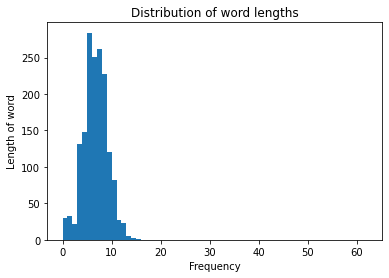

In [48]:
b = range(0,max(fl))
plt.hist(fw, bins = b )
plt.title('Distribution of word lengths')
plt.xlabel('Frequency')
plt.ylabel('Length of word')
plt.show()

### B. A histogram showing the distribution of sentence lengths

In [4]:
x = df['docs'].tolist()
# x[0]

In [6]:
len_sen = []
for i in range(len(x)):
    len_sen.append(x[i].split("."))

In [7]:
fl = []
for l in len_sen:
    fl.append(len(l))
# fl

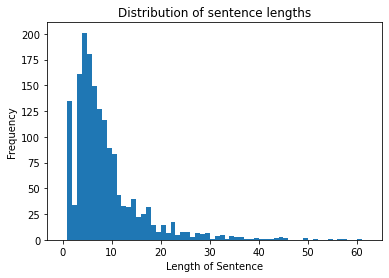

In [8]:
b = range(0,max(fl))
plt.hist(fl, bins = b )
plt.title('Distribution of sentence lengths')
plt.xlabel('Length of Sentence')
plt.ylabel('Frequency')
plt.show()

### C. Top frequent worods before and after pre processing

In [10]:
#what are the most common words?
joined_processed = ' '.join(df['docs'])
lis_npp = pd.Series(joined_processed.split()).value_counts()[:]
print("The top 10 words before pre processing are:\n", lis_npp[:10] )

The top 10 words before pre processing are:
 .       11549
the      8692
,        8287
of       6653
to       5515
said     4961
and      4334
a        4326
in       3517
;        2796
dtype: int64


In [11]:
#what are the most common words?
joined_processed = ' '.join(df['processed_docs'])
lis_pp = pd.Series(joined_processed.split()).value_counts()[:]
print("The top 10 words after pre processing are:\n",lis_pp[:10] )

The top 10 words after pre processing are:
 the     10364
of       6863
to       6125
said     5000
a        4623
and      4428
in       3973
it       3321
lt       2784
for      2421
dtype: int64


### D. Top frequent pairs of words after pre-processing. These are pairs of words which appear together in sentences and are called bigrams.

In [12]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though']

from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['processed_docs'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_n2gram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [19]:
print("Top 10 Bigrams")
df_n2gram.drop(labels = 0, axis = 0).head(10)

Top 10 Bigrams


,frequency,bigram/trigram
1,470,company said
2,425,inc said
3,311,corp said
4,265,dlrs share
5,263,per share
6,222,common stock
7,220,tender offer
8,195,corp lt
9,190,inc lt
10,178,common shares


In [14]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though']

from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['processed_docs'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_n3gram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


### E. Top frequent tuples of words after pre-processing

In [17]:
print("Displaying top 10 tuples after processing")
df_n3gram.drop(labels = 0, axis = 0).head(10)

Displaying top 10 tuples after processing


,frequency,bigram/trigram
1,151,dlrs per share
2,78,filing securities exchange
3,74,pct total outstanding
4,62,mln dlrs cash
5,58,dlr per share
6,54,signed letter intent
7,50,told securities exchange
8,48,outstanding common stock
9,44,said agreed principle
10,43,said signed letter
